<a href="https://colab.research.google.com/github/Mizoroki-Heck/Kaggle_competition/blob/preprocessing/House%20Prices/House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv('/content/sample_data/train.csv')
data_test = pd.read_csv('/content/sample_data/test.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data_train.shape

(1460, 81)

In [ ]:
data_train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##Посмотрим на пропуски в процентах##


In [ ]:
for col in data_train.columns:
  print(f'{col}: {data_train[col].isna().sum() / data_train.shape[0] * 100:.2f}%')


Id: 0.00%
MSSubClass: 0.00%
MSZoning: 0.00%
LotFrontage: 17.74%
LotArea: 0.00%
Street: 0.00%
Alley: 93.77%
LotShape: 0.00%
LandContour: 0.00%
Utilities: 0.00%
LotConfig: 0.00%
LandSlope: 0.00%
Neighborhood: 0.00%
Condition1: 0.00%
Condition2: 0.00%
BldgType: 0.00%
HouseStyle: 0.00%
OverallQual: 0.00%
OverallCond: 0.00%
YearBuilt: 0.00%
YearRemodAdd: 0.00%
RoofStyle: 0.00%
RoofMatl: 0.00%
Exterior1st: 0.00%
Exterior2nd: 0.00%
MasVnrType: 0.55%
MasVnrArea: 0.55%
ExterQual: 0.00%
ExterCond: 0.00%
Foundation: 0.00%
BsmtQual: 2.53%
BsmtCond: 2.53%
BsmtExposure: 2.60%
BsmtFinType1: 2.53%
BsmtFinSF1: 0.00%
BsmtFinType2: 2.60%
BsmtFinSF2: 0.00%
BsmtUnfSF: 0.00%
TotalBsmtSF: 0.00%
Heating: 0.00%
HeatingQC: 0.00%
CentralAir: 0.00%
Electrical: 0.07%
1stFlrSF: 0.00%
2ndFlrSF: 0.00%
LowQualFinSF: 0.00%
GrLivArea: 0.00%
BsmtFullBath: 0.00%
BsmtHalfBath: 0.00%
FullBath: 0.00%
HalfBath: 0.00%
BedroomAbvGr: 0.00%
KitchenAbvGr: 0.00%
KitchenQual: 0.00%
TotRmsAbvGrd: 0.00%
Functional: 0.00%
Fireplaces: 0

##Видим несколько категорий, где очень много пропусков##
Alley, PoolQC, Fence, MiscFeature


<Axes: >

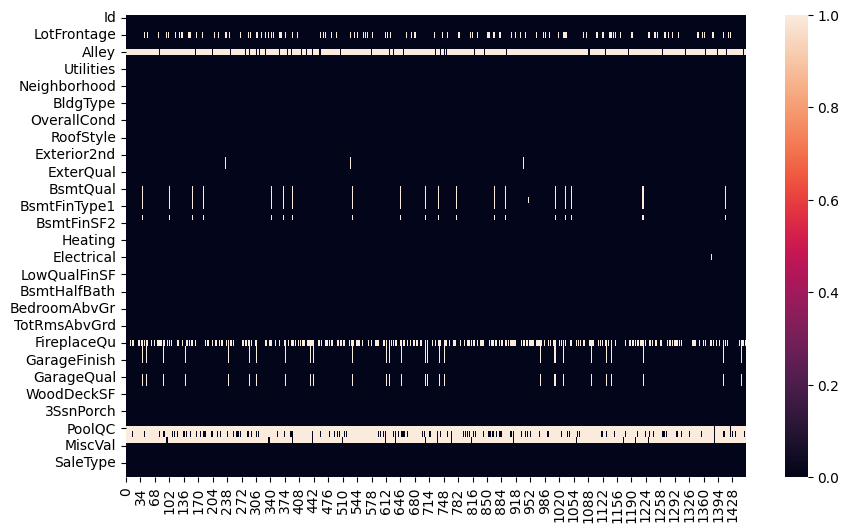

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data_train.isnull().transpose())

In [ ]:
data_train = data_train.drop(['Id','Alley','PoolQC','Fence', 'MiscFeature'], axis=1)

##Построим матрицу корреляции признаков##
Судя по всему, больше всего коррелируют OverallQual и GrLivArea

<ipython-input-23-fc09e8ba036e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data_train.corr()


Text(171.72222222222234, 0.5, 'Features')

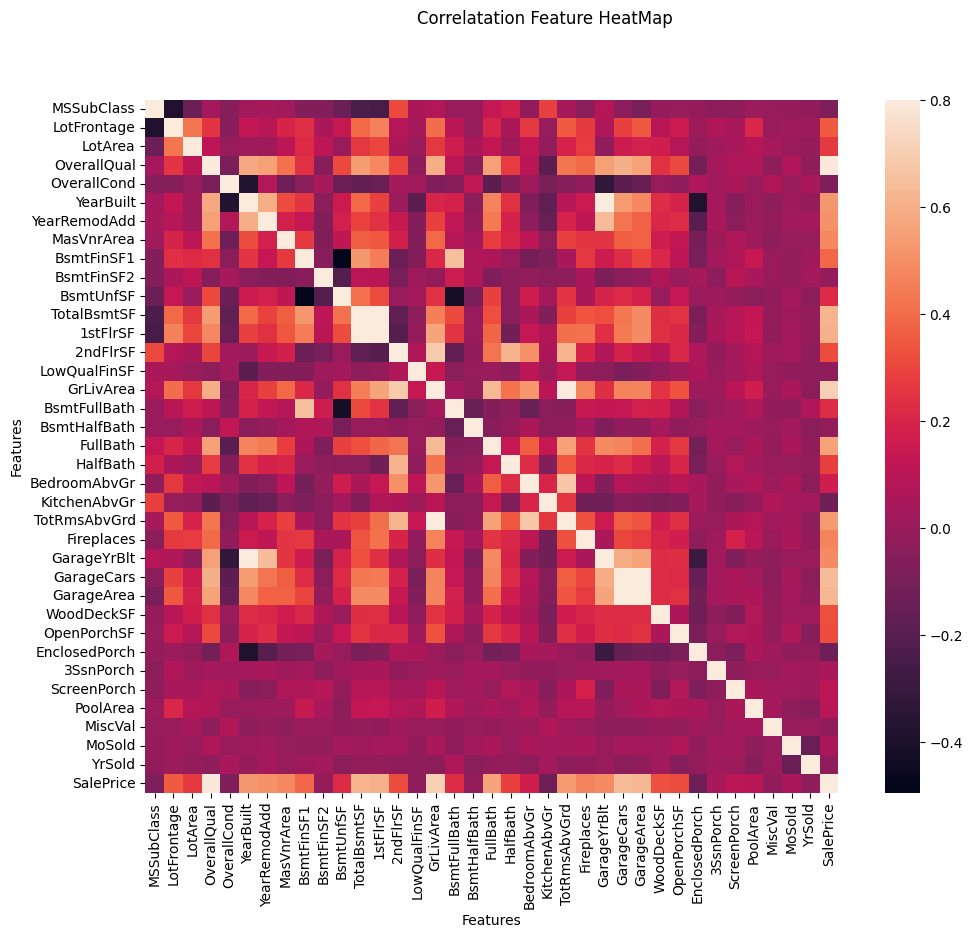

In [ ]:
#correlation matrix
corr_mat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, vmax=.8,square=True)

plt.suptitle("Correlatation Feature HeatMap")
plt.xlabel("Features")
plt.ylabel("Features")

<ipython-input-26-ed439b6abcf7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data_train.corr()


Text(99.74999999999999, 0.5, 'Features')

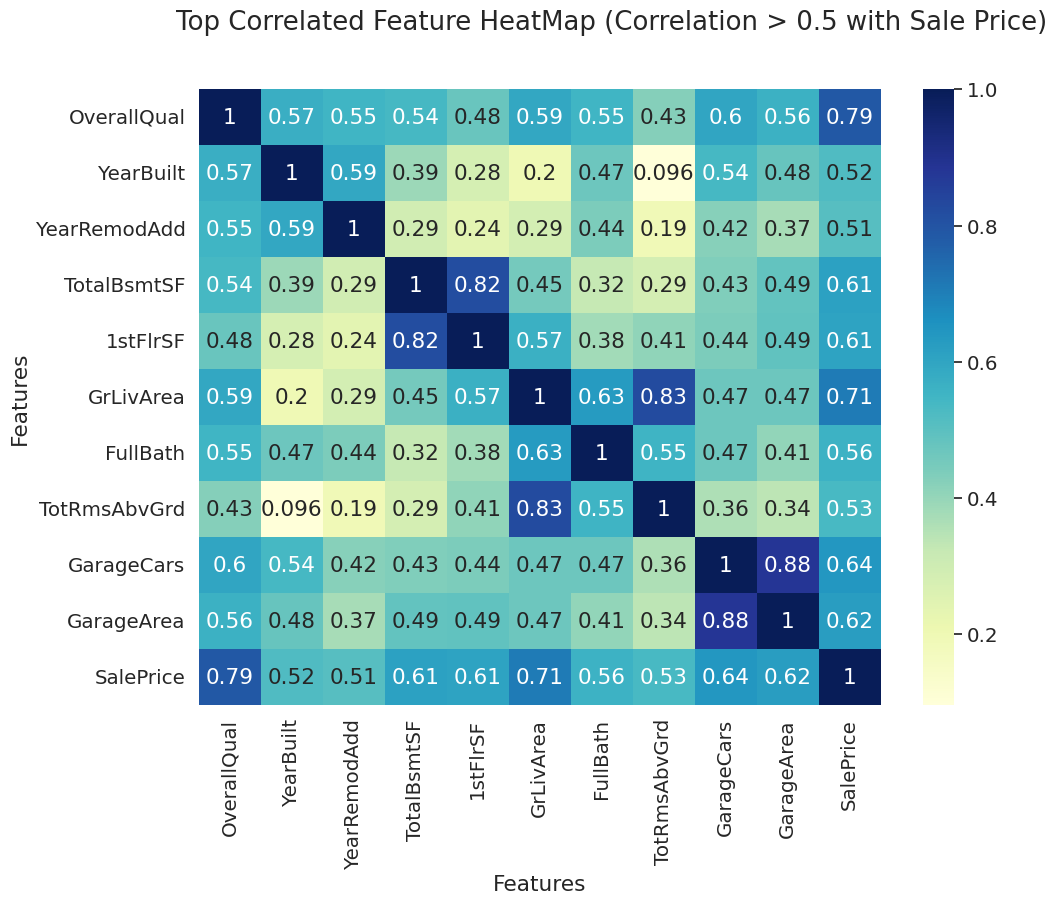

In [ ]:
corr_mat = data_train.corr()

sns.set(font_scale = 1.3)
plt.figure(figsize = (11,8))

best_corr = corr_mat.index[abs(corr_mat["SalePrice"])>0.5]
g = sns.heatmap(data_train[best_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.5 with Sale Price)")
plt.xlabel("Features")
plt.ylabel("Features")

#Обработка данных#